# Reconhecendo digitos escritos a mão usando o Data set MNIST 

### Importando MNIST

In [0]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [0]:
# Separando dados de treino e teste

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [55]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [56]:
train_labels[0]

5

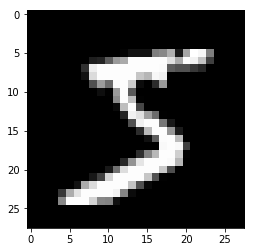

5


In [57]:
from matplotlib import pyplot as plt
%matplotlib inline

# PLotar uma imagem em escala de cinza com o seu respectivo label
plt.imshow(train_images[0], cmap='gray')
plt.show()

print(train_labels[0])

## Verificando o tamanho do Dataset

In [58]:
# Tamanho do conjunto de dados de treino
train_images.shape


(60000, 28, 28)

In [59]:
# Mostrando array com os labels de treino(classes)
np.unique(train_labels) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [60]:
# Tamanho do conjunto de dados de teste
test_images.shape

(10000, 28, 28)

In [61]:
# Mostrando array com os labels de teste (classes)
np.unique(train_labels) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Flating (Achatar a imagem)

In [0]:
# Achatando as imagens em um array de 784 de tamaho com cada imagem com dimensão de 28 * 28
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

## Normalizando
- Normalizando os tons de 0 a 255 para 0 e 1

In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [64]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Categorizando One Hot Encoder
- Colocar 1 onde a classe acontece em um vetor, ou seja:
  - 0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, ]
  - 1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, ]
  - 2 = [0, 0, 2, 0, 0, 0, 0, 0, 0, ]
  - ...
  - 9 = [1, 0, 0, 0, 0, 0, 0, 0, 1, ]


In [0]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [66]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Importando Tensorflow e Keras

In [0]:
from tensorflow.keras import models, layers

## Criando uma Rede Neural

In [68]:
model = models.Sequential()

# Dense - Todos os neuronios da camada são conectados com os outros da proxima
model.add(layers.Dense(32, activation='sigmoid', input_shape=(28*28,))) # Primeira cada oculta

# Camada de saida usando a função de ativação softmax, uma vez que o problema é 
# categorico, por isso os dez neuronios de saida.
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Criando compilador Keras

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics =['accuracy']
             )

## Treinando a Rede Neural

In [70]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.8314 - acc: 0.8290
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3464 - acc: 0.9092
Epoch 3/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2740 - acc: 0.9234
Epoch 4/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2401 - acc: 0.9318
Epoch 5/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2173 - acc: 0.9379
Epoch 6/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1998 - acc: 0.9430
Epoch 7/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1863 - acc: 0.9470
Epoch 8/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1748 - acc: 0.9502
Epoch 9/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1651 - acc: 0.9529
Epoch 10/10
60000/60000 [==============================] - 1s 18us/sample - loss: 

## Verificando a Acurácia da Rede

In [71]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1678 - acc: 0.9530


# Salvando o modelo

In [0]:
model.save('carteiro-virtual.h5')